In [2]:
!pip install plotly dash dash_core_components

   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   ------------------------ --------------- 6.0/9.8 MB 36.7 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 30.6 MB/s  0:00:00

   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   ---------------------------------------- 0/2 [narwhals]
   -------------------- ------------------- 1/2 [plotly]
   -------------------- ------------------- 1/2 [plotly]
   -------------

Product 1 enters the factory at 0
Product 2 enters the factory at 0
Product 3 enters the factory at 0
Product 4 enters the factory at 0
Product 5 enters the factory at 0
Product 1 leaves the factory at 12.789316511947384, total time: 12.789316511947384
Product 2 leaves the factory at 20.452421851728936, total time: 20.452421851728936
Product 3 leaves the factory at 28.437341796151248, total time: 28.437341796151248
Product 4 leaves the factory at 39.781223651968276, total time: 39.781223651968276
Product 5 leaves the factory at 43.77111741362602, total time: 43.77111741362602
Utilisation of Machine 1: 80.18%
Utilisation of Machine 2: 41.43%


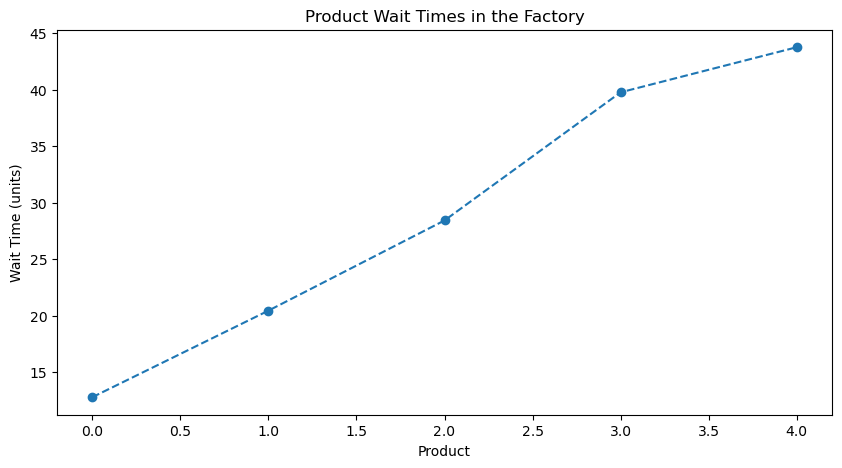

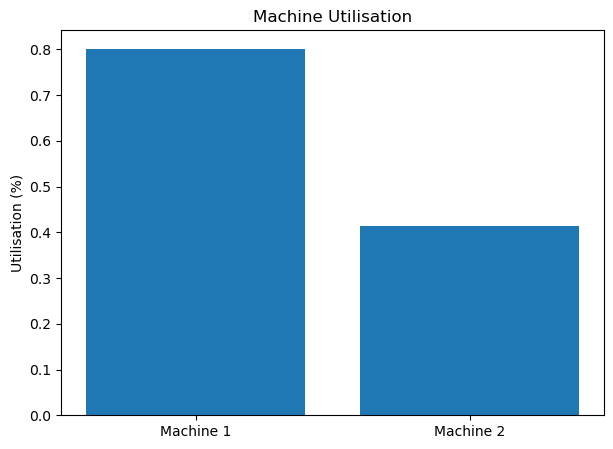

Average product wait time: 29.05
Utilisation of Machine 1: 80.18%
Utilisation of Machine 2: 41.43%


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


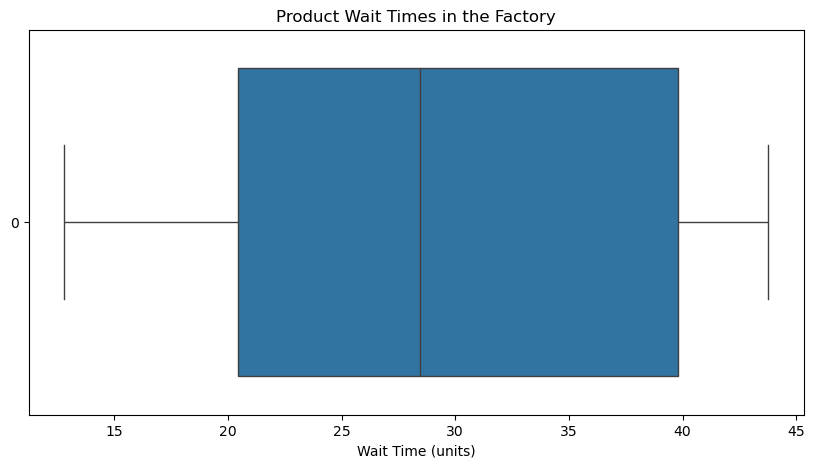

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


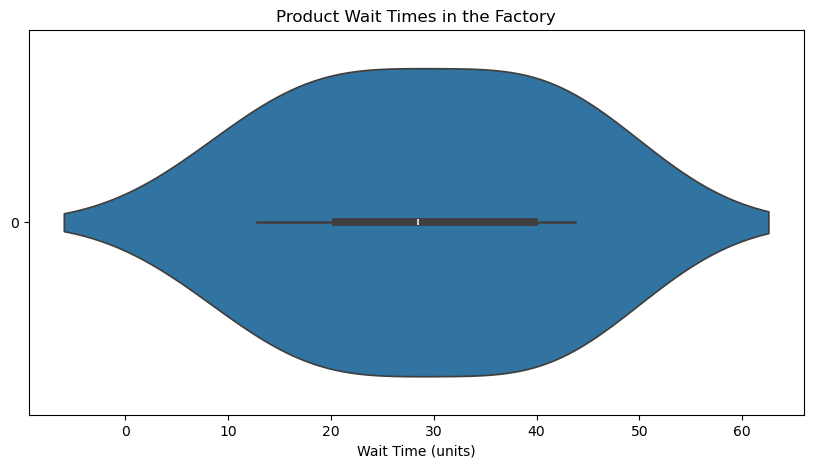

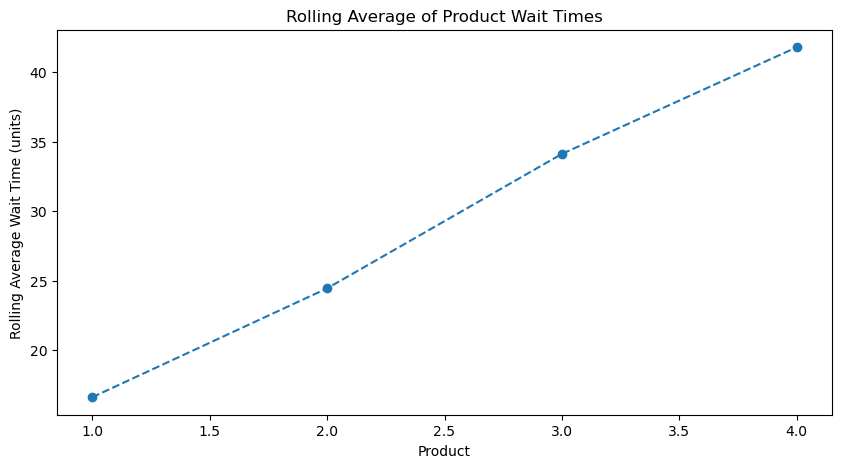

In [8]:
import simpy
import random
import pandas as pd
import matplotlib.pyplot as plt
import logging
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import dash
import dash_core_components as dcc
from dash import html


# Data collection lists
product_wait_times = []
machine_utilisation = {'Machine 1': 0, 'Machine 2': 0}

# Product process
def product(env, name, machine1, machine2):
    arrival_time = env.now
    print(f'{name} enters the factory at {env.now}')

    # Request and use Machine 1
    with machine1.request() as req1:
        yield req1
        start_time_machine1 = env.now
        yield env.timeout(random.uniform(5, 10))  # Process time on Machine 1
        machine_utilisation['Machine 1'] += env.now - start_time_machine1

    # Request and use Machine 2
    with machine2.request() as req2:
        yield req2
        start_time_machine2 = env.now
        yield env.timeout(random.uniform(3, 7))  # Process time on Machine 2
        machine_utilisation['Machine 2'] += env.now - start_time_machine2

    # Record the total time spent in the system
    total_time = env.now - arrival_time
    product_wait_times.append(total_time)
    print(f'{name} leaves the factory at {env.now}, total time: {total_time}')

# Set up the simulation environment
env = simpy.Environment()

# Create resources for the machines
machine1 = simpy.Resource(env, capacity=1)
machine2 = simpy.Resource(env, capacity=1)

# Add products to the simulation
for i in range(5):
    env.process(product(env, f'Product {i+1}', machine1, machine2))

# Run the simulation for 50 units of time
env.run(until=50)

# Calculate utilisation rates
simulation_time = 50
utilisation_machine1 = machine_utilisation['Machine 1'] / simulation_time
utilisation_machine2 = machine_utilisation['Machine 2'] / simulation_time

print(f'Utilisation of Machine 1: {utilisation_machine1:.2%}')
print(f'Utilisation of Machine 2: {utilisation_machine2:.2%}')



# Plot product wait times
plt.figure(figsize=(10, 5))
plt.plot(product_wait_times, marker='o', linestyle='--')
plt.title('Product Wait Times in the Factory')
plt.xlabel('Product')
plt.ylabel('Wait Time (units)')
plt.show()

# Plot machine utilisation as a bar chart
machines = ['Machine 1', 'Machine 2']
utilisations = [utilisation_machine1, utilisation_machine2]

plt.figure(figsize=(7, 5))
plt.bar(machines, utilisations)
plt.title('Machine Utilisation')
plt.ylabel('Utilisation (%)')
plt.show()

# Calculate the average wait time
average_wait_time = sum(product_wait_times) / len(product_wait_times)
print(f'Average product wait time: {average_wait_time:.2f}')

# Calculate utilisation rates
simulation_time = 50
utilisation_machine1 = machine_utilisation['Machine 1'] / simulation_time
utilisation_machine2 = machine_utilisation['Machine 2'] / simulation_time

print(f'Utilisation of Machine 1: {utilisation_machine1:.2%}')
print(f'Utilisation of Machine 2: {utilisation_machine2:.2%}')


# Set up logging
logging.basicConfig(level=logging.INFO)


# Product process with logging
def product(env, name, machine1, machine2):
    arrival_time = env.now
    logging.info(f'{name} enters the factory at {env.now}')

    # Request and use Machine 1
    with machine1.request() as req1:
        yield req1
    start_time_machine1 = env.now
    yield env.timeout(random.uniform(5, 10))
    machine_utilisation['Machine 1'] += env.now - start_time_machine1
    logging.info(f'{name} finished at Machine 1 at {env.now}')

    # Request and use Machine 2
    with machine2.request() as req2:
        yield req2
    start_time_machine2 = env.now
    yield env.timeout(random.uniform(3, 7))
    machine_utilisation['Machine 2'] += env.now - start_time_machine2
    logging.info(f'{name} finished at Machine 2 at {env.now}')

    total_time = env.now - arrival_time
    product_wait_times.append(total_time)
    logging.info(f'{name} leaves the factory at {env.now}, total time: {total_time}')


# Box plot for processing times by stage
plt.figure(figsize=(10, 5))
sns.boxplot(data=[product_wait_times], orient='h')
plt.title('Product Wait Times in the Factory')
plt.xlabel('Wait Time (units)')
plt.show()


# Violin plot for visualising the distribution of processing times
plt.figure(figsize=(10, 5))
sns.violinplot(data=[product_wait_times], orient='h')
plt.title('Product Wait Times in the Factory')
plt.xlabel('Wait Time (units)')
plt.show()



# Create a sample dataset for a heatmap
data = {
    'Machine': ['Machine 1', 'Machine 1', 'Machine 2', 'Machine 2'],
    'Product': ['Product 1', 'Product 2', 'Product 1', 'Product 2'],
    'Processing Time': [8, 7, 6, 5]
}
df = pd.DataFrame(data)
fig = px.imshow(df.pivot(index='Machine', columns='Product', values='Processing Time'))
fig.update_layout(title='Processing Times by Machine and Product')
fig.show()


# Calculate rolling average of wait times over time
rolling_average = pd.Series(product_wait_times).rolling(window=2).mean()

# Plot the rolling average
plt.figure(figsize=(10, 5))
plt.plot(rolling_average, marker='o', linestyle='--')
plt.title('Rolling Average of Product Wait Times')
plt.xlabel('Product')
plt.ylabel('Rolling Average Wait Time (units)')
plt.show()


# Create a Dash application
app = dash.Dash(__name__)

# Define the layout of the dashboard
app.layout = html.Div([
    html.H1('Product Wait Times Dashboard'),
    dcc.Graph(
        id='product-wait-times',
        figure={
            'data': [{
                'x': list(range(1, len(product_wait_times) + 1)),
                'y': product_wait_times,
                'type': 'line',
                'name': 'Wait Time'
            }],
            'layout': {
                'title': 'Product Wait Times',
                'xaxis': {'title': 'Product'},
                'yaxis': {'title': 'Wait Time (units)'}
            }
        }
    )
])

# Run the Dash application
if __name__ == '__main__':
    app.run(debug=True)
